# HOUSE PRICES - ADVANCE REGRESSION TECHNIQUES

predicting the sale prices of houses with the different features

In [60]:
# Importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [193]:
# Import the train data set
df= pd.read_csv('House_price/train.csv', low_memory=False)

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'Year House was sold')

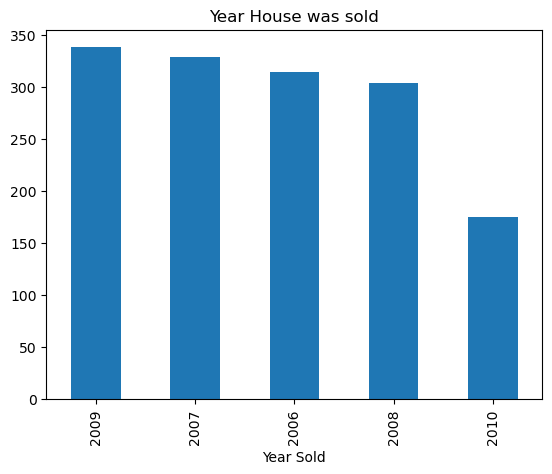

In [62]:
# Year of the most sold houses
df.YrSold.value_counts().plot(kind='bar')
plt.xlabel('Year Sold')
plt.title('Year House was sold')

In [63]:
# Months of the most sold houses
df.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

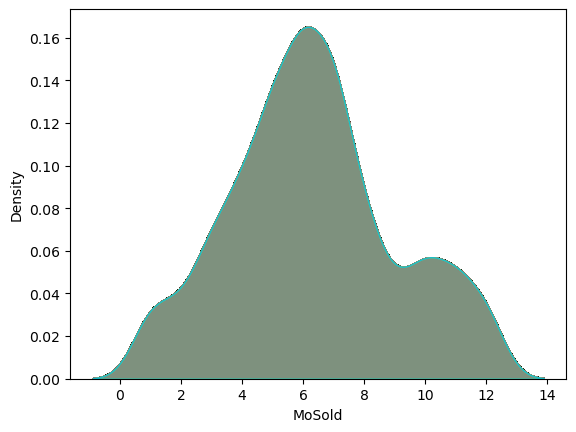

In [64]:
for col in df['MoSold']:
    sns.kdeplot(df['MoSold'], shade=True)

In [65]:
# Checking how old the house has been before sale
df['L_Span'] = df['YrSold'] - df['YearRemodAdd']
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,L_Span
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [66]:
mean_MsSubClass = df.groupby(['YrSold']).agg({'MSSubClass': 'mean'})
mean_MsSubClass

,MSSubClass
YrSold,
2006,59.888535
2007,54.316109
2008,59.029605
2009,54.674556
2010,56.971429


In [194]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Preprocessing

In [230]:
# Importing the neccessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [199]:
# Checking for empty cells in the dataframe
df.isna().count_values()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Converting non- numerical values to numerical



In [204]:
# Checking for string datatype 

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [205]:
# Changing them to category
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype('category').cat.as_ordered()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [206]:
# FILL CATEGORICAL VALUES(NON NUMERIC VALUE)

# Check first
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [208]:
# Convert to numeric

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label]=pd.Categorical(content).codes + 1

In [130]:
# Checking again
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [131]:
# Fill NUmeric Column with missing values
 
# Check first for missing Numeric data
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [132]:
# Fill NUmeric Column with missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label]=content.fillna(content.median())

In [133]:
# Check again
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [159]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Modelling

In [215]:
# Assigning data to x and y

x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [136]:
x.shape, y.shape

((1460, 80), (1460,))

In [50]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,L_Span
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,12,2008,WD,Normal,250000,8


In [210]:
for label, content in df.items(): 
        if pd.api.types.is_string_dtype(content):
            df_test[label] = content.astype("category").cat.as_ordered() 

In [213]:
for label, content in df.items():
      if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label]=content.fillna(content.median())

In [214]:
for label, content in df.items():
      if not pd.api.types.is_numeric_dtype(content):
                df[label]=pd.Categorical(content).codes + 1

In [216]:
# Splitting data
model = RandomForestRegressor(n_jobs = -1,
                             random_state = 42)

x_train,x_test, y_train, y_test=train_test_split(x,
                                                y,
                                                test_size = 0.2)

In [217]:
# Fit model
model.fit(x_train,y_train)

# Scoring model
model.score(x_test,y_test)

0.866448336480517

In [ ]:
# Checking with confusion metrics



# Building our Root-Mean-Squared-Error (RMSE) 

In [240]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_preds):
    return np.sqrt(mean_squared_error(y_test,y_preds))

# create a function to evaluate model on a few different levels
def show_scores(model):
    y_preds = model.predict(x_train)
    scores = {'Training MAE is' : mean_absolute_error(y_train, y_preds),
             'Training RMSE is' : rmse(y_train,y_preds),
             'Training R^2' : r2_score(y_train, y_preds)}
    return scores

In [241]:
%%time
model.fit(x_train,y_train)

Wall time: 1.25 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [242]:
show_scores(model)

{'Training MAE is': 6722.378690068494,
 'Training RMSE is': 11323.038611834401,
 'Training R^2': 0.9797737236588803}

# Hyperparamter tuning with RandomizedSearchCV

In [247]:
from sklearn.model_selection import RandomizedSearchCV

rs = {'n_estimators' : np.arange(10,100,10),
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': np.arange(2, 20, 2),
        'min_samples_leaf': np.arange(1, 20, 2),
        'max_features': [0.5, 1, 'sqrt', 'auto']}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                               random_state=42),
                          param_distributions=rs,
                          n_iter=10,
                          cv=5,
                          verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [248]:
show_scores(rs_model)

{'Training MAE is': 13202.244577792582,
 'Training RMSE is': 23344.609597352188,
 'Training R^2': 0.9140267804191177}

In [249]:
# Checking for best parameters

rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_features': 0.5,
 'max_depth': None}

# Train a model with the best hyperparameters

In [250]:
%%time
best_model = RandomForestRegressor(n_estimators=40,
                                  min_samples_split = 18,
                                  min_samples_leaf = 5,
                                  max_features = 0.5,
                                  max_depth = None,
                                  random_state = 42)
best_model.fit(x_train,y_train)

Wall time: 438 ms


RandomForestRegressor(max_features=0.5, min_samples_leaf=5,
                      min_samples_split=18, n_estimators=40, random_state=42)

### Having all trained models for comparison

In [262]:
show_scores(model)

{'Training MAE is': 6722.378690068494,
 'Training RMSE is': 11323.038611834401,
 'Training R^2': 0.9797737236588803}

In [263]:
show_scores(rs_model)

{'Training MAE is': 13202.244577792582,
 'Training RMSE is': 23344.609597352184,
 'Training R^2': 0.9140267804191177}

In [251]:
show_scores(best_model)

{'Training MAE is': 13202.244577792582,
 'Training RMSE is': 23344.609597352184,
 'Training R^2': 0.9140267804191177}

# Making predictions

In [256]:
# Import the test set
df_test = pd.read_csv('House_price/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [271]:
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype('category').cat.as_ordered()
    
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label]=content.fillna(content.median())
                
    if not pd.api.types.is_numeric_dtype(content):
            df_test[label]=pd.Categorical(content).codes + 1

In [272]:
test_preds = model.predict(df_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Alley_is_missing
- BldgType_is_missing
- BsmtCond_is_missing
- BsmtExposure_is_missing
- BsmtFinType1_is_missing
- ...
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 123 features, but RandomForestRegressor is expecting 80 features as input.

In [273]:
# Balancing columns
set(df_test.columns) - set(x_train.columns)

{'Alley_is_missing',
 'BldgType_is_missing',
 'BsmtCond_is_missing',
 'BsmtExposure_is_missing',
 'BsmtFinType1_is_missing',
 'BsmtFinType2_is_missing',
 'BsmtQual_is_missing',
 'CentralAir_is_missing',
 'Condition1_is_missing',
 'Condition2_is_missing',
 'Electrical_is_missing',
 'ExterCond_is_missing',
 'ExterQual_is_missing',
 'Exterior1st_is_missing',
 'Exterior2nd_is_missing',
 'Fence_is_missing',
 'FireplaceQu_is_missing',
 'Foundation_is_missing',
 'Functional_is_missing',
 'GarageCond_is_missing',
 'GarageFinish_is_missing',
 'GarageQual_is_missing',
 'GarageType_is_missing',
 'HeatingQC_is_missing',
 'Heating_is_missing',
 'HouseStyle_is_missing',
 'KitchenQual_is_missing',
 'LandContour_is_missing',
 'LandSlope_is_missing',
 'LotConfig_is_missing',
 'LotShape_is_missing',
 'MSZoning_is_missing',
 'MasVnrType_is_missing',
 'MiscFeature_is_missing',
 'Neighborhood_is_missing',
 'PavedDrive_is_missing',
 'PoolQC_is_missing',
 'RoofMatl_is_missing',
 'RoofStyle_is_missing',
 'Sal

In [274]:
# Deleting unwanted columns
df_test.drop(['Alley_is_missing',
 'BldgType_is_missing',
 'BsmtCond_is_missing',
 'BsmtExposure_is_missing',
 'BsmtFinType1_is_missing',
 'BsmtFinType2_is_missing',
 'BsmtQual_is_missing',
 'CentralAir_is_missing',
 'Condition1_is_missing',
 'Condition2_is_missing',
 'Electrical_is_missing',
 'ExterCond_is_missing',
 'ExterQual_is_missing',
 'Exterior1st_is_missing',
 'Exterior2nd_is_missing',
 'Fence_is_missing',
 'FireplaceQu_is_missing',
 'Foundation_is_missing',
 'Functional_is_missing',
 'GarageCond_is_missing',
 'GarageFinish_is_missing',
 'GarageQual_is_missing',
 'GarageType_is_missing',
 'HeatingQC_is_missing',
 'Heating_is_missing',
 'HouseStyle_is_missing',
 'KitchenQual_is_missing',
 'LandContour_is_missing',
 'LandSlope_is_missing',
 'LotConfig_is_missing',
 'LotShape_is_missing',
 'MSZoning_is_missing',
 'MasVnrType_is_missing',
 'MiscFeature_is_missing',
 'Neighborhood_is_missing',
 'PavedDrive_is_missing',
 'PoolQC_is_missing',
 'RoofMatl_is_missing',
 'RoofStyle_is_missing',
 'SaleCondition_is_missing',
 'SaleType_is_missing',
 'Street_is_missing',
 'Utilities_is_missing'], axis=1, inplace=True)

In [276]:
test_preds = model.predict(df_test)
test_preds

array([127382.08, 151981.5 , 180801.32, ..., 155212.36, 113083.5 ,
       225210.99])

In [280]:
df_test.shape, y_preds.shape

((1459, 80), (1459,))

In [285]:
# Compare target column with SaleCondition
pd.crosstab(df.SalePrice, df.YrSold)

YrSold,2006,2007,2008,2009,2010
SalePrice,,,,,
34900,0,0,0,1,0
35311,1,0,0,0,0
37900,0,0,0,1,0
39300,0,1,0,0,0
40000,0,0,1,0,0
...,...,...,...,...,...
582933,0,0,0,1,0
611657,0,0,0,0,1
625000,1,0,0,0,0


# Feature Importances

In [290]:
model.feature_importances_

array([4.07662642e-03, 1.59376383e-03, 2.31147220e-03, 5.97895469e-03,
       1.86083628e-02, 1.37715092e-05, 1.10246311e-04, 1.56184218e-03,
       1.67604850e-03, 0.00000000e+00, 7.17116299e-04, 7.66709513e-04,
       8.46023510e-03, 4.33610689e-04, 3.44855113e-04, 5.11902238e-04,
       6.75793557e-04, 5.91479344e-01, 4.47535850e-03, 7.66149817e-03,
       7.79057819e-03, 8.00322707e-04, 4.88605343e-04, 1.35426301e-03,
       1.19440747e-03, 8.48271865e-04, 8.19681170e-03, 3.76311845e-03,
       5.93705905e-04, 2.98205761e-04, 2.63087224e-03, 5.72968347e-04,
       1.73978916e-03, 7.99081287e-04, 2.17477524e-02, 3.24290179e-04,
       4.45476032e-04, 5.28076965e-03, 3.79757653e-02, 9.89625529e-05,
       7.65415597e-04, 2.14083680e-03, 1.43401868e-04, 3.40286730e-02,
       1.94121888e-02, 1.34179394e-04, 1.04903766e-01, 8.19306167e-04,
       1.16318771e-03, 4.21508524e-03, 7.07642839e-04, 1.49283206e-03,
       1.17546015e-03, 1.99943247e-03, 5.80460139e-03, 6.17949062e-04,
      

In [291]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                       'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    
    #Plot the dataframe
    fig, ax=plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

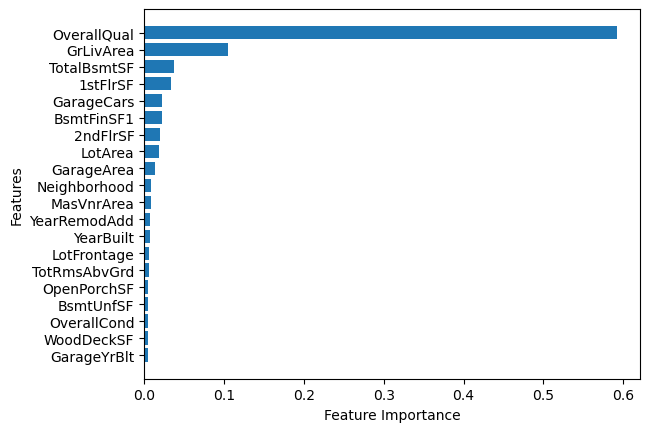

In [293]:
plot_features(x_train.columns, model.feature_importances_)

# Saving our predicted SalePrice

In [294]:
test_preds

array([127382.08, 151981.5 , 180801.32, ..., 155212.36, 113083.5 ,
       225210.99])

In [295]:
df_preds= pd.DataFrame()
df_preds['Id'] = df_test['Id']
df_preds['SalePrice'] = test_preds
df_preds

,Id,SalePrice
0,1461,127382.08
1,1462,151981.50
2,1463,180801.32
3,1464,186866.32
4,1465,197088.12
...,...,...
1454,2915,86669.00
1455,2916,88198.00
1456,2917,155212.36
1457,2918,113083.50


In [300]:
# Exporting our predicted SalePrice
df_preds.to_csv('House_price/House_SalePrice_Submission', index= False)